In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('Suicidios.csv')
df=pd.DataFrame(data)
df.head()

#Exploración de datos

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.rename(columns = {' gdp_for_year ($) ':'gdp_for_year'},inplace=True)
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df['gdp_for_year']=df['gdp_for_year'].str.replace(',','')

In [6]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [6]:
df['gdp_for_year']=df.gdp_for_year.astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year          27820 non-null int64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [8]:
df.info()
#No tengo nulos en las columnas que me interesan. LOs números están en formato int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year          27820 non-null int64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [9]:
#LImpieza de datos. 
df.columns = df.columns.str.strip()

In [10]:
df.drop(['population','suicides/100k pop','country-year', 'HDI for year','gdp_per_capita ($)', 'generation'], axis=1, inplace=True)
#df1=df.loc[df.country=='Spain']
#df1df.head()

In [11]:
df.head()

,country,year,sex,age,suicides_no,gdp_for_year
0,Albania,1987,male,15-24 years,21,2156624900
1,Albania,1987,male,35-54 years,16,2156624900
2,Albania,1987,female,15-24 years,14,2156624900
3,Albania,1987,male,75+ years,1,2156624900
4,Albania,1987,male,25-34 years,9,2156624900


In [12]:
# df1=df.loc[df.country=='Spain']
# df1

df1=df.query("country=='Spain' | country=='Germany' | country=='France' | country=='Italy' | country=='Belgium'| country=='Denmark'| country=='Croatia'| country=='Finland'| country=='Slovakia'| country=='Greece'| country=='Austria' | country=='Bulgary'| country=='Slovenia'| country=='Estonia' | country=='Hungary'| country=='Ireland' | country=='Poland'| country=='Portugal' | country=='Netherlands'| country=='Romania'| country=='Sweden'| country=='Czech Republic'")
df1.head(50)

#df1=df.loc[(df['country']=='Spain') & (df['country']=='Albania')]
#df1
#df1=df.loc[df.country=='Spain']
#df1
#df4=df3.loc[(df3['year'] >=2005) & (df3['year'] <=2015)]

,country,year,sex,age,suicides_no,gdp_for_year
1786,Austria,1985,male,75+ years,152,69386774475
1787,Austria,1985,male,55-74 years,355,69386774475
1788,Austria,1985,male,35-54 years,515,69386774475
1789,Austria,1985,male,25-34 years,232,69386774475
1790,Austria,1985,female,75+ years,110,69386774475
1791,Austria,1985,male,15-24 years,207,69386774475
1792,Austria,1985,female,55-74 years,220,69386774475
1793,Austria,1985,female,35-54 years,186,69386774475
1794,Austria,1985,female,25-34 years,56,69386774475
1795,Austria,1985,female,15-24 years,50,69386774475


In [13]:
#INtenté sacar un multindice pero no fue buena idea. Iterar indice columna no era tan fácil.
#df1.set_index(['country', 'year'], inplace=True)
#df1

In [14]:
#df1.loc['Spain', (2006,2007,2008,2009,2010,2011,2012,2013,2014), :]
#df1.loc[('Spain', 2000), :]


In [15]:
# df1.groupby(['country', 'year']).sum()
#NO entiendo por qué no lo hace.
#df2 = df1.groupby(['country', 'year']).agg(sum)
#df3 = pd.merge(df1, df2, on=['country', 'year'], how='inner')
#df3.head()

In [16]:

df2=df1.groupby(['country','year', 'gdp_for_year'])['suicides_no'].sum().reset_index()
df3=df2[['country','year','suicides_no','gdp_for_year']]
df3

#suicidios_por_año=[]
#sumatorio=0
##my_dict={}
#for index, row in df1.iterrows():
    #my_dict[row['year']] = my_dict.get(row['year'], 0) + row['suicides_no']
    
    
    
       # sumatorio+=row['suicides_no']
        #suicidios_por_año.insert(index,)
        #suicidios_por_año.append(sum(row['suicides_no']))
#print(my_dict)
    #for y in df1.suicides_no:
      #  
        #    
#print(suicidios_por_año)



            

,country,year,suicides_no,gdp_for_year
0,Austria,1985,2091,69386774475
1,Austria,1986,2139,99036165210
2,Austria,1987,2069,124168442860
3,Austria,1988,1851,133339397080
4,Austria,1989,1898,133105805928
5,Austria,1990,1825,166463386663
6,Austria,1991,1769,173794177725
7,Austria,1992,1759,195078126346
8,Austria,1993,1704,190379720927
9,Austria,1994,1776,203535242742


In [17]:
df3['country'].unique()

array(['Austria', 'Belgium', 'Croatia', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden'], dtype=object)

In [18]:
suicide_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
bins = pd.qcut(df3['suicides_no'],5, labels=suicide_labels)
bins.head(10)

0        High
1        High
2        High
3    Moderate
4        High
5    Moderate
6    Moderate
7    Moderate
8    Moderate
9    Moderate
Name: suicides_no, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

In [30]:
selected=input('Hi, we are an app that deals with suicide data within the EU. Please, enter a Country of the UE and we will give you the correlation between number of suicides and the evolution of the gdp')

Hi, we are an app that deals with suicide data within the EU. Please, enter a Country of the UE and we will give you the correlation between number of suicides and the evolution of the gdpGermany


In [31]:
df4=df3.loc[df3.country==str(selected)]
df4.head()
#df4=df3.loc[df3.country=='selected']
#df4.head()

,country,year,suicides_no,gdp_for_year
214,Germany,1990,13924,1764967948917
215,Germany,1991,14010,1861873895109
216,Germany,1992,13458,2123130870382
217,Germany,1993,12690,2068555542411
218,Germany,1994,12718,2205966011812


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


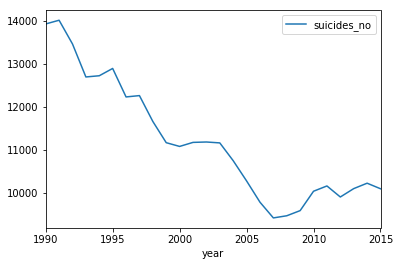

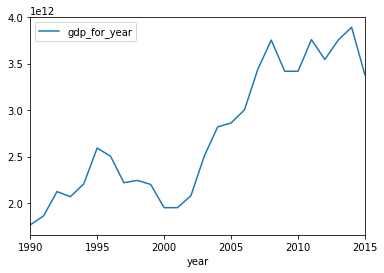

In [33]:
df4.sort_values(by=['year', 'suicides_no'], inplace=True)
df4.plot(x='year', y=['suicides_no'])
df4.sort_values(by=['year', 'gdp_for_year'], inplace=True)
df4.plot(x='year', y=['gdp_for_year'])



In [ ]:
data1 = pd.read_csv('poblacion_mundial.csv')
df5=pd.DataFrame(data1)
df5.head(100)

In [ ]:
df5.columns

In [ ]:
df5.rename(columns = {'Country Name':'Country'},inplace=True)
df5.head()

In [ ]:
df6=df5.query("Country=='Spain' | Country=='Germany' | Country=='France' | Country=='Italy' | Country=='Belgium'| Country=='Denmark'| Country=='Croatia'| Country=='Finland'| Country=='Slovakia'| Country=='Greece'| Country=='Austria' | Country=='Bulgary'| Country=='Slovenia'| Country=='Estonia' | Country=='Hungary'| Country=='Ireland' | Country=='Poland'| Country=='Portugal' | Country=='Netherlands'| Country=='Romania'| Country=='Sweden'| Country=='Czech Republic'")
df6

In [ ]:
df6.info()

In [ ]:
lista=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
for b in lista:
    df6[b]= df6[b].astype(int)
df6.info()

df6.info()

In [ ]:
df6.head()

In [ ]:
df6.drop(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984'], axis=1, inplace=True)

In [ ]:
df6.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [ ]:
df6.head()

In [ ]:
df6.T.T
#suicidios_por_año=[]
#sumatorio=0
##my_dict={}
#for index, row in df1.iterrows():
    #my_dict[row['year']] = my_dict.get(row['year'], 0) + row['suicides_no']
    
    
    
       # sumatorio+=row['suicides_no']
        #suicidios_por_año.insert(index,)
        #suicidios_por_año.append(sum(row['suicides_no']))
#print(my_dict)
    #for y in df1.suicides_no:
      #  
        #    
#print(suicidios_por_año)

In [ ]:
df6.drop(['2016', '2017','2018'], axis=1, inplace=True)

In [ ]:
df6.groupby(['Country'])

In [ ]:
df6.head()